# Análise de dados - FitBit Bellabeat - EDA

Autor: Marco Cruz

Dados: https://www.kaggle.com/datasets/arashnic/fitbit

Data: 05-07-2023

    Sršen pede-lhe que analise os dados de utilização de dispositivos inteligentes, a fim de obter informações sobre a forma como os consumidores utilizam dispositivos inteligentes que não sejam da Bellabeat. Depois, quer que seleccione um produto Bellabeat para aplicar estas informações na sua apresentação. Estas perguntas orientarão a sua análise: 

1. Quais são as tendências na utilização de dispositivos inteligentes? 
2. Como é que estas tendências se podem aplicar aos clientes da Bellabeat? 
3. Como é que estas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat? 


    Deverá produzir um relatório com os seguintes resultados: 
1. Um resumo claro da tarefa comercial 
2. Uma descrição de todas as fontes de dados utilizadas 
3. Documentação de qualquer limpeza ou manipulação de dados 
4. Um resumo da sua análise 
5. Visualizações de apoio e principais conclusões 
6. As suas principais recomendações de conteúdo de alto nível com base na sua análise 


    Sršen incentiva-o a utilizar dados públicos que exploram os hábitos diários dos utilizadores de dispositivos inteligentes. Ela indica-lhe um conjunto de dados específico: 

    [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) : Este conjunto de dados do Kaggle 

    Kaggle contém o rastreador de fitness pessoal de trinta utilizadores do Fitbit. Trinta utilizadores elegíveis do Fitbit consentiram na submissão de dados pessoais do rastreador, incluindo resultados ao nível do minuto para atividade física, frequência cardíaca e monitorização do sono. Inclui informações sobre a atividade diária, os passos e o ritmo cardíaco que podem ser utilizadas para explorar os hábitos dos utilizadores. 

    Sršen diz-lhe que este conjunto de dados pode ter algumas limitações e encoraja-o a considerar a adição de outros dados para ajudar a para ajudar a resolver essas limitações à medida que começa a trabalhar mais com estes dados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
pd.options.display.float_format = "{:.2f}".format

In [2]:
dailyActivity = pd.read_csv("./dailyActivity_merged.csv")

display(dailyActivity.head(),
        dailyActivity.describe().T,
        dailyActivity.shape,
        dailyActivity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.00,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.00,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.00,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.00,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.00,2.71,0.41,5.04,0.00,36,10,221,773,1863


,count,mean,std,min,25%,50%,75%,max
Id,940.00,4855407369.33,2424805475.66,1503960366.00,2320127002.00,4445114986.00,6962181067.00,8877689391.00
TotalSteps,940.00,7637.91,5087.15,0.00,3789.75,7405.50,10727.00,36019.00
TotalDistance,940.00,5.49,3.92,0.00,2.62,5.24,7.71,28.03
TrackerDistance,940.00,5.48,3.91,0.00,2.62,5.24,7.71,28.03
LoggedActivitiesDistance,940.00,0.11,0.62,0.00,0.00,0.00,0.00,4.94
VeryActiveDistance,940.00,1.50,2.66,0.00,0.00,0.21,2.05,21.92
ModeratelyActiveDistance,940.00,0.57,0.88,0.00,0.00,0.24,0.80,6.48
LightActiveDistance,940.00,3.34,2.04,0.00,1.95,3.36,4.78,10.71
SedentaryActiveDistance,940.00,0.00,0.01,0.00,0.00,0.00,0.00,0.11
VeryActiveMinutes,940.00,21.16,32.84,0.00,0.00,4.00,32.00,210.00


(940, 15)

None

In [3]:
len(dailyActivity["Id"].unique())

33

- Foram 33 pessoas pesquisadas.

In [4]:
len(dailyActivity["ActivityDate"].unique())

31

In [5]:
dailySleep = pd.read_csv("./sleepDay_merged.csv")

display(dailySleep.head(), dailySleep.describe().T, dailySleep.info(), dailySleep.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


,count,mean,std,min,25%,50%,75%,max
Id,413.00,5000979403.21,2060360173.74,1503960366.00,3977333714.00,4702921684.00,6962181067.00,8792009665.00
TotalSleepRecords,413.00,1.12,0.35,1.00,1.00,1.00,1.00,3.00
TotalMinutesAsleep,413.00,419.47,118.34,58.00,361.00,433.00,490.00,796.00
TotalTimeInBed,413.00,458.64,127.10,61.00,403.00,463.00,526.00,961.00


None

(413, 5)

In [6]:
grpIdSleep = dailySleep.groupby("Id")\
    .aggregate({
        "TotalMinutesAsleep" : "mean"
    })\
    .sort_values("TotalMinutesAsleep", ascending=False)\
    .reset_index()

grpIdSleep["TotalHoursAsleep"] = grpIdSleep["TotalMinutesAsleep"] / 60

display(grpIdSleep, grpIdSleep.describe())

,Id,TotalMinutesAsleep,TotalHoursAsleep
0,1844505072,652.00,10.87
1,2026352035,506.18,8.44
2,6117666160,478.78,7.98
3,4319703577,476.65,7.94
4,5553957443,463.48,7.72
5,7086361926,453.12,7.55
6,6962181067,448.00,7.47
7,2347167796,446.80,7.45
8,8378563200,443.34,7.39
9,8792009665,435.67,7.26


,Id,TotalMinutesAsleep,TotalHoursAsleep
count,24.00,24.00,24.00
mean,4763820468.38,377.65,6.29
std,2288232796.19,136.76,2.28
min,1503960366.00,61.00,1.02
25%,2340407597.50,336.28,5.60
50%,4501862455.00,419.07,6.98
75%,6822461983.00,449.28,7.49
max,8792009665.00,652.00,10.87


In [7]:
weightInfo = pd.read_csv("./weightLogInfo_merged.csv")

display(
    weightInfo.head(),
    weightInfo.info(),
    weightInfo.describe(),
    weightInfo.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.60,115.96,22.00,22.65,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.60,115.96,NaN,22.65,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.50,294.32,NaN,47.54,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.70,125.00,NaN,21.45,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.30,126.32,NaN,21.69,True,1463097599000


None

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,67.00,67.00,67.00,2.00,67.00,67.00
mean,7009282134.66,72.04,158.81,23.50,25.19,1461771594283.58
std,1950321943.92,13.92,30.70,2.12,3.07,782994783.61
min,1503960366.00,52.60,115.96,22.00,21.45,1460443631000.00
25%,6962181067.00,61.40,135.36,22.75,23.96,1461079185000.00
50%,6962181067.00,62.50,137.79,23.50,24.39,1461801599000.00
75%,8877689391.00,85.05,187.50,24.25,25.56,1462375450500.00
max,8877689391.00,133.50,294.32,25.00,47.54,1463097599000.00


(67, 8)

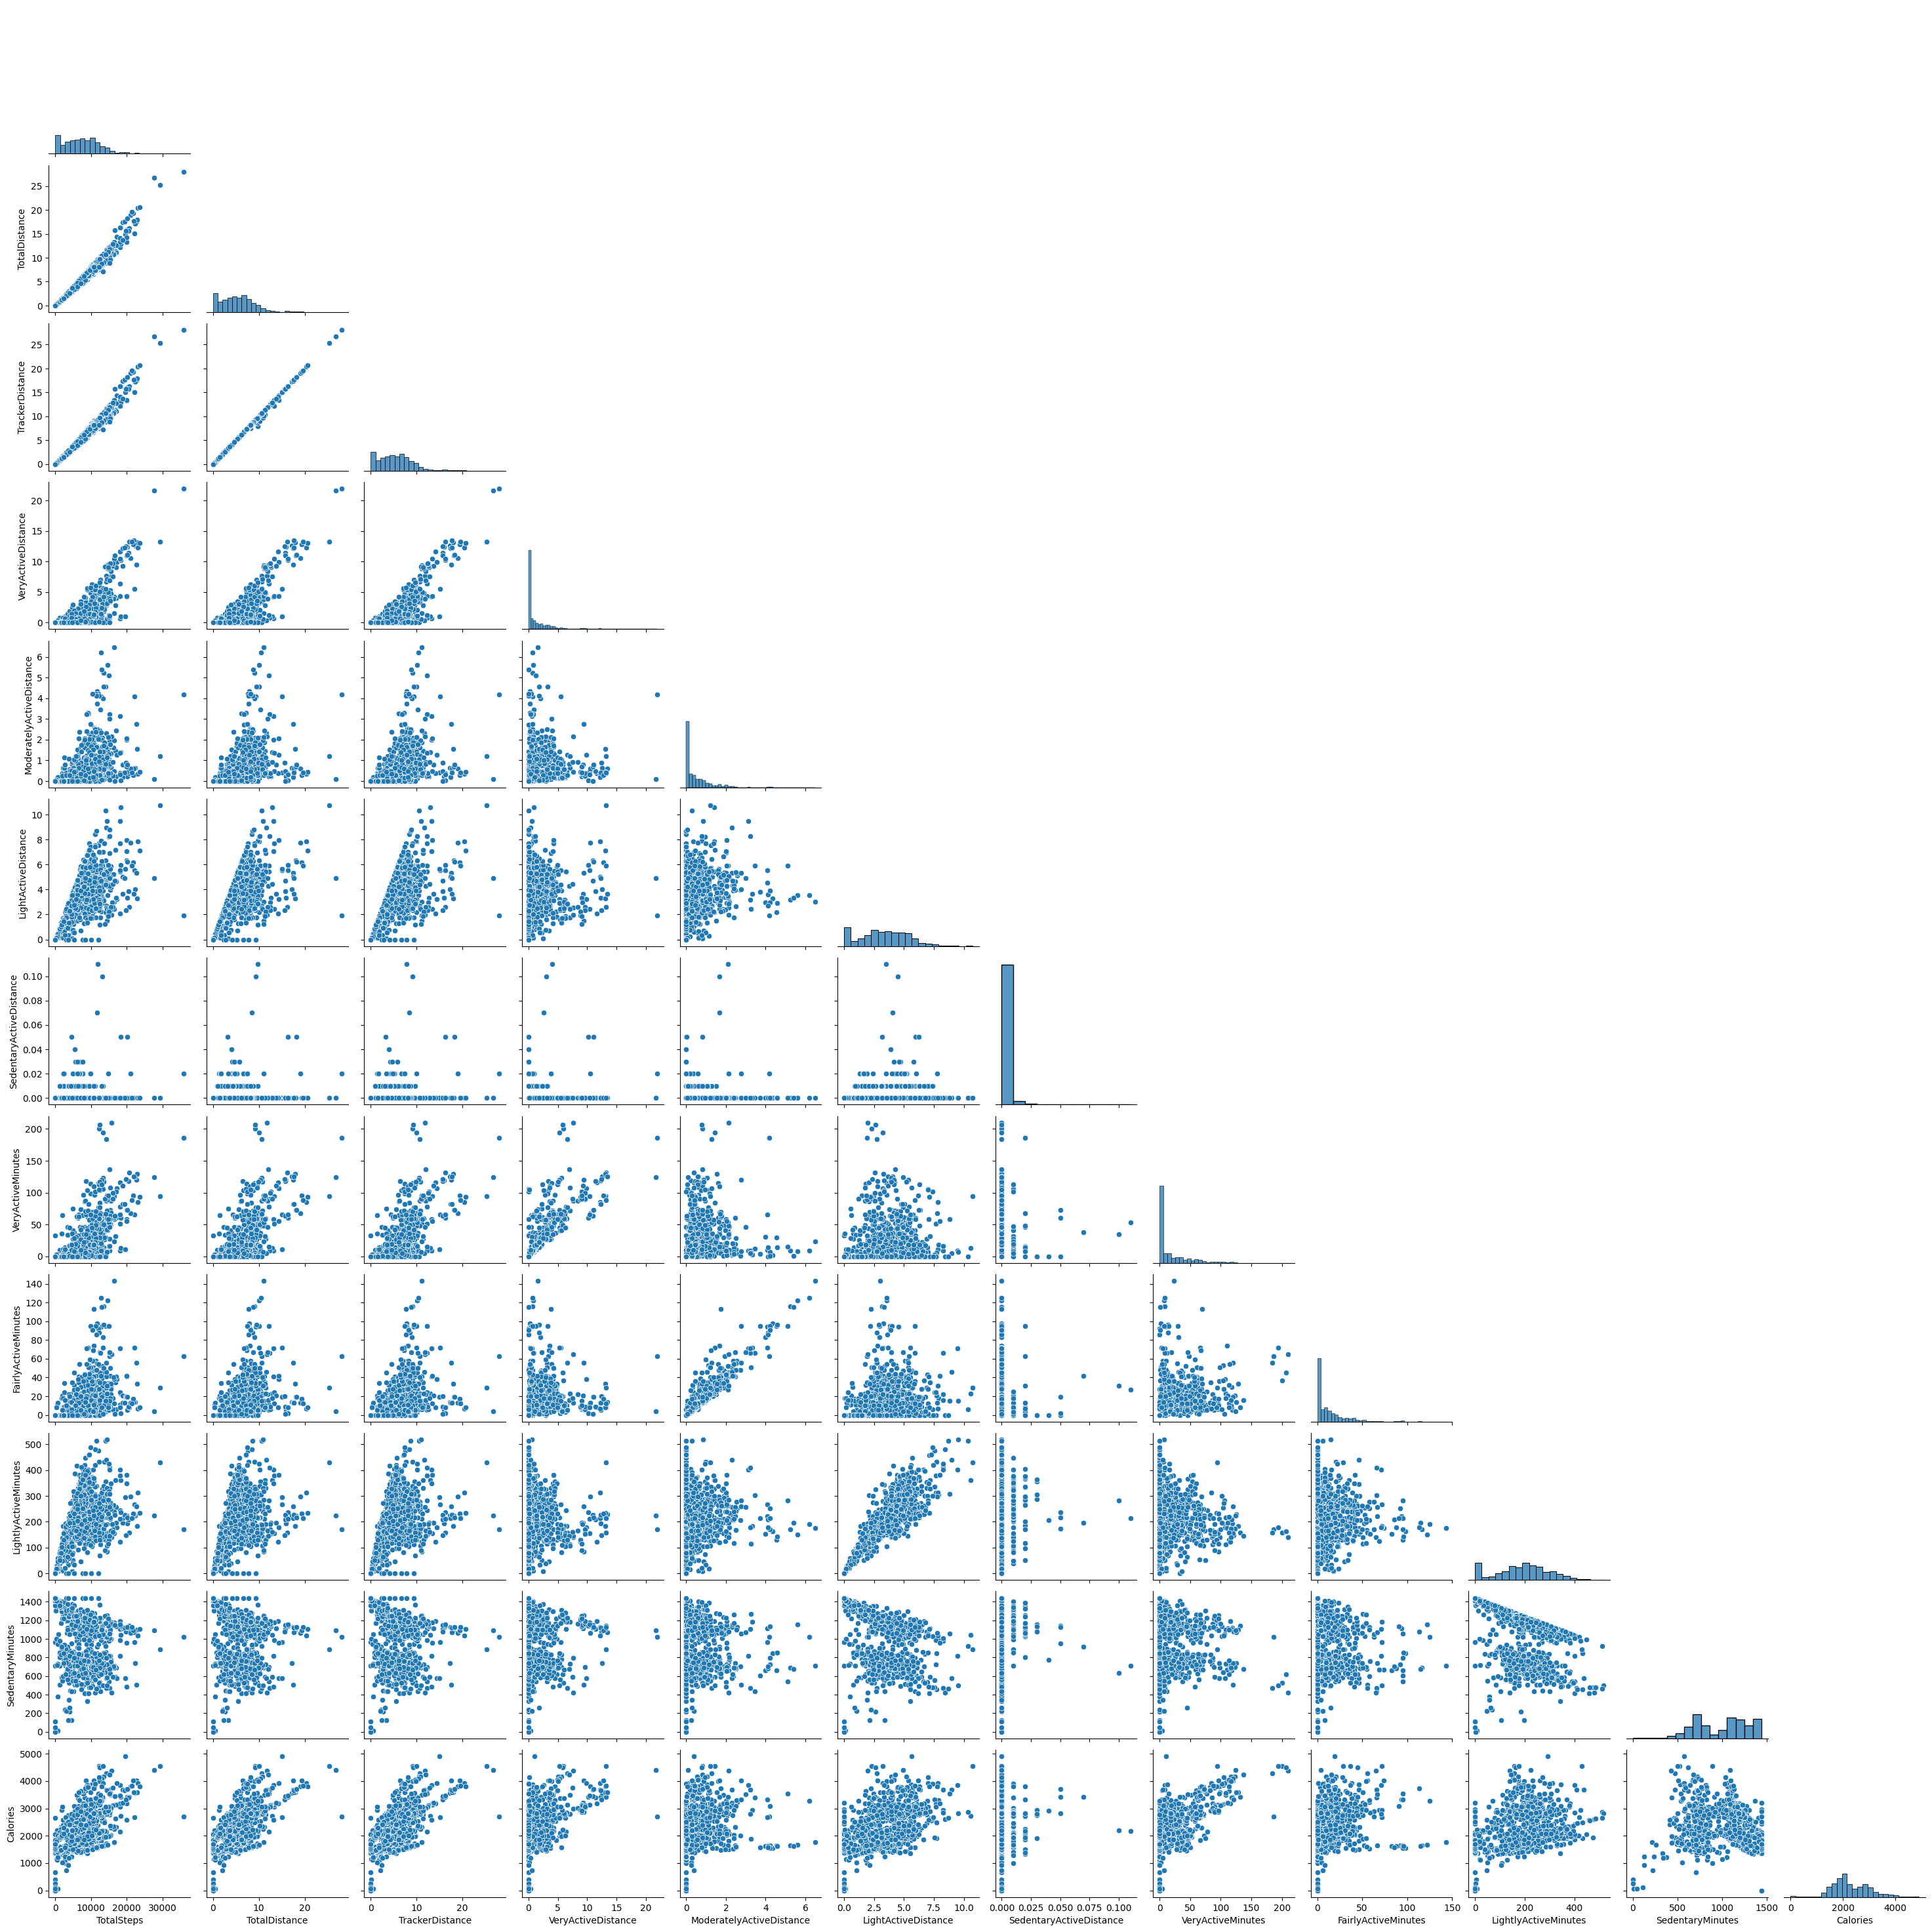

In [8]:
sns.pairplot(data=dailyActivity.drop(columns=["Id", "LoggedActivitiesDistance"]), corner=True)

In [9]:
dailyActivity.drop(columns=["Id", "LoggedActivitiesDistance", "ActivityDate"]).corr()

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.00,0.99,0.98,0.74,0.51,0.69,0.07,0.67,0.50,0.57,-0.33,0.59
TotalDistance,0.99,1.00,1.00,0.79,0.47,0.66,0.08,0.68,0.46,0.52,-0.29,0.64
TrackerDistance,0.98,1.00,1.00,0.79,0.47,0.66,0.07,0.68,0.46,0.51,-0.29,0.65
VeryActiveDistance,0.74,0.79,0.79,1.00,0.19,0.16,0.05,0.83,0.21,0.06,-0.06,0.49
ModeratelyActiveDistance,0.51,0.47,0.47,0.19,1.00,0.24,0.01,0.23,0.95,0.16,-0.22,0.22
LightActiveDistance,0.69,0.66,0.66,0.16,0.24,1.00,0.10,0.15,0.22,0.89,-0.41,0.47
SedentaryActiveDistance,0.07,0.08,0.07,0.05,0.01,0.10,1.00,0.01,-0.02,0.12,0.04,0.04
VeryActiveMinutes,0.67,0.68,0.68,0.83,0.23,0.15,0.01,1.00,0.31,0.05,-0.16,0.62
FairlyActiveMinutes,0.50,0.46,0.46,0.21,0.95,0.22,-0.02,0.31,1.00,0.15,-0.24,0.30
LightlyActiveMinutes,0.57,0.52,0.51,0.06,0.16,0.89,0.12,0.05,0.15,1.00,-0.44,0.29


In [10]:
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"], format="%m/%d/%Y")

dailyActivity["Weekday"] = dailyActivity["ActivityDate"].apply(lambda x: x.weekday())\
.replace({
    0 : "Monday",
    1 : "Tuesday",
    2 : "Wednesday",
    3 : "Thursday",
    4 : "Friday",
    5 : "Saturday",
    6 : "Sunday"
})

In [11]:
dailyActivity["TotalActivity"] = (dailyActivity["VeryActiveMinutes"] + dailyActivity["FairlyActiveMinutes"] + dailyActivity["LightlyActiveMinutes"]) / 60

In [12]:
grpWkday = dailyActivity.groupby(["Weekday"])\
    .agg({
        "Id" : "count",
        "TotalDistance" : ["sum", "mean"],
        "Calories" : ["sum", "mean"],
        "TotalActivity" : ["sum", "mean"]
    })\
    .sort_values(("TotalActivity", "sum"), ascending=False)\
    .reset_index()

display(grpWkday)

Weekday    Id TotalDistance      Calories         TotalActivity     
             count           sum mean      sum    mean           sum mean
0    Tuesday   152        886.50 5.83   358114 2356.01        594.40 3.91
1  Wednesday   150        823.25 5.49   345393 2302.62        559.33 3.73
2   Thursday   147        780.90 5.31   323337 2199.57        531.13 3.61
3   Saturday   124        725.98 5.85   292016 2354.97        504.82 4.07
4     Friday   126        669.05 5.31   293805 2331.79        496.37 3.94
5     Monday   120        666.35 5.55   278905 2324.21        458.33 3.82
6     Sunday   121        608.29 5.03   273823 2263.00        420.45 3.47

In [13]:
display(grpWkday.sort_values(("TotalActivity", "mean"), ascending=False))

Weekday    Id TotalDistance      Calories         TotalActivity     
             count           sum mean      sum    mean           sum mean
3   Saturday   124        725.98 5.85   292016 2354.97        504.82 4.07
4     Friday   126        669.05 5.31   293805 2331.79        496.37 3.94
0    Tuesday   152        886.50 5.83   358114 2356.01        594.40 3.91
5     Monday   120        666.35 5.55   278905 2324.21        458.33 3.82
1  Wednesday   150        823.25 5.49   345393 2302.62        559.33 3.73
2   Thursday   147        780.90 5.31   323337 2199.57        531.13 3.61
6     Sunday   121        608.29 5.03   273823 2263.00        420.45 3.47

- Mais pessoas treinam por mais tempo de terça até quinta.
- De Sexta a Sábado, Menos pessoas treinam mas treinam com mais intensidade.

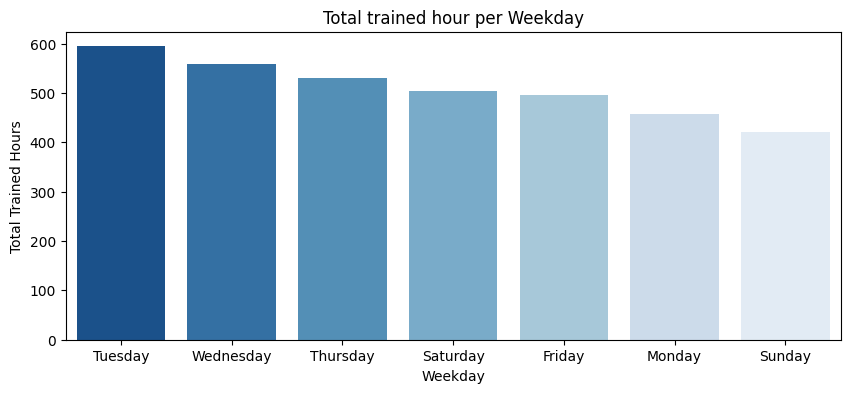

In [14]:
plt.subplots(figsize=(10, 4))
sns.barplot(data=grpWkday, x="Weekday", y=("TotalActivity", "sum"), palette="Blues_r")\
.set(xlabel="Weekday", 
     ylabel="Total Trained Hours", 
     title="Total trained hour per Weekday")
plt.show()

- Existem mais registros de treinos de terça à quinta feira.

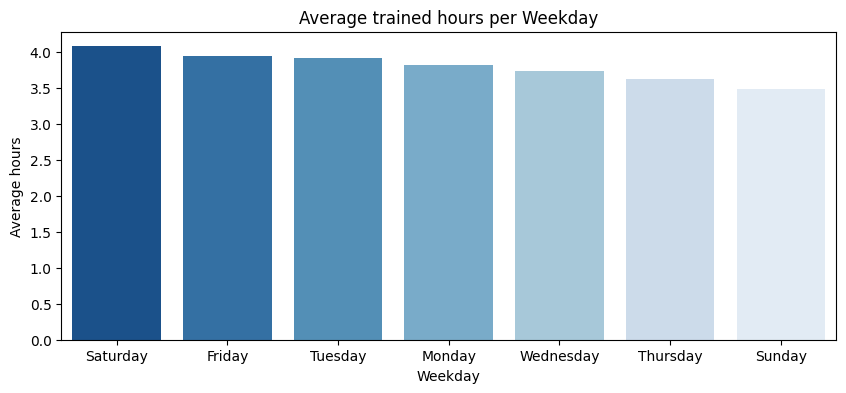

In [15]:
plt.subplots(figsize=(10, 4))
sns.barplot(data=grpWkday.sort_values(("TotalActivity", "mean"), ascending=False),
            x="Weekday", y=("TotalActivity", "mean"), palette="Blues_r")\
            .set(xlabel="Weekday",
                 ylabel="Average hours",
                 title="Average trained hours per Weekday")
plt.show()

- As pessoas que treinam aos sábados e sextas treinam por mais tempo e mais pesado.

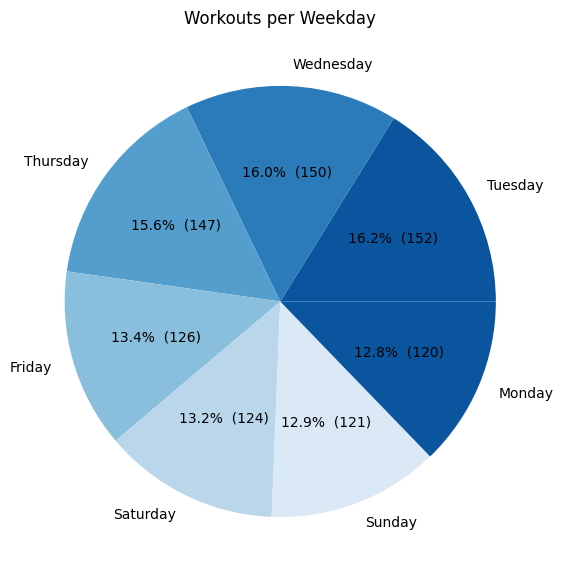

In [16]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

cmap = sns.color_palette("Blues_r").as_hex()

srtd = grpWkday.sort_values(("Id", "count"), ascending=False)

plt.subplots(figsize=(7, 7))
plt.pie(x=srtd[("Id", "count")], 
        labels = srtd["Weekday"],
        autopct = make_autopct(srtd[("Id", "count")]),
        colors = cmap)
plt.title(label="Workouts per Weekday")
plt.show()

In [17]:
mets = pd.read_csv("./minuteMETsNarrow_merged.csv")

display(mets.info(), mets.describe(), mets.head(), mets.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


None

,Id,METs
count,1325580.00,1325580.00
mean,4847897691.86,14.69
std,2422313222.28,12.06
min,1503960366.00,0.00
25%,2320127002.00,10.00
50%,4445114986.00,10.00
75%,6962181067.00,11.00
max,8877689391.00,157.00


,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


(1325580, 3)

In [18]:
mets[mets["METs"] < 10]

,Id,ActivityMinute,METs
57419,1624580081,4/21/2016 11:59:00 PM,0
126059,1644430081,5/8/2016 11:59:00 PM,6
279059,2026352035,4/23/2016 11:59:00 PM,0
713039,4558609924,5/11/2016 11:59:00 PM,0
1065794,7086361926,4/29/2016 6:14:00 PM,0
1075885,7086361926,5/6/2016 6:25:00 PM,0
1076219,7086361926,5/6/2016 11:59:00 PM,0
1105799,8053475328,4/26/2016 11:59:00 PM,0


In [19]:
mets[mets["METs"] > 12].groupby("Id")\
.agg({
    "METs" : ["count", "mean", "max", "sum"]
})\
.sort_values([("METs", "mean")], ascending=False)

METs                   
            count  mean  max     sum
Id                                  
8053475328   7616 49.70  135  378499
8378563200   6951 44.74   82  311006
1503960366   8600 40.21  111  345811
8253242879   2873 39.04  117  112173
3977333714   7635 38.98  137  297630
8877689391  15497 36.81  141  570500
4057192912    419 35.87   78   15030
5577150313  14035 35.64  138  500222
2022484408  11746 35.56  146  417642
7086361926   9840 35.37  127  348032
1644430081   6256 35.23   84  220410
8583815059   5268 34.54   80  181956
6775888955   2706 34.42   95   93148
5553957443   7792 34.32  108  267452
4702921684   8328 33.85   86  281882
2873212765  10143 33.01  157  334819
6962181067  10447 32.71  112  341733
4319703577   7585 32.36  127  245416
7007744171  11055 32.19  106  355891
2347167796   6188 31.82  120  196929
1624580081   5199 31.42  107  163372
4388161847  12522 31.42  141  393433
2320127002   6262 30.55  103  191310
1927972279   1261 30.54   76   38512
4445114986   6718 30.48   98  204741
1844505072   3623 30.05   74  108870
2026352035   8027 29.92   81  240182
3372868164   6811 29.01  111  197618
6290855005   6779 28.79  138  195176
6117666160   9867 28.37  123  279910
4558609924  12602 28.09  144  354043
8792009665   4482 27.10   98  121447
4020332650   5714 26.30  140  150277

In [20]:
mets["Weekday"] = pd.to_datetime(mets["ActivityMinute"], format="%m/%d/%Y %I:%M:%S %p").apply(lambda x: x.weekday())\
.replace({
    0 : "Monday",
    1 : "Tuesday",
    2 : "Wednesday",
    3 : "Thursday",
    4 : "Friday",
    5 : "Saturday",
    6 : "Sunday"
})

mets["WeekdayNum"] = pd.to_datetime(mets["ActivityMinute"], format="%m/%d/%Y %I:%M:%S %p").apply(lambda x: x.weekday())

In [21]:
grpWdayMets = mets[mets["METs"] >= 12].groupby(["WeekdayNum", "Weekday"])\
.agg({
    "METs" : ["count", "mean", "max", "sum"]
}).reset_index()

display(grpWdayMets)

WeekdayNum    Weekday   METs                    
                         count  mean  max      sum
0          0     Monday  41133 29.09  141  1196641
1          1    Tuesday  56228 28.40  141  1596614
2          2  Wednesday  51510 28.65  141  1475773
3          3   Thursday  48299 28.62  146  1382231
4          4     Friday  45548 28.28  140  1287887
5          5   Saturday  45602 28.98  157  1321400
6          6     Sunday  37672 29.10  144  1096266

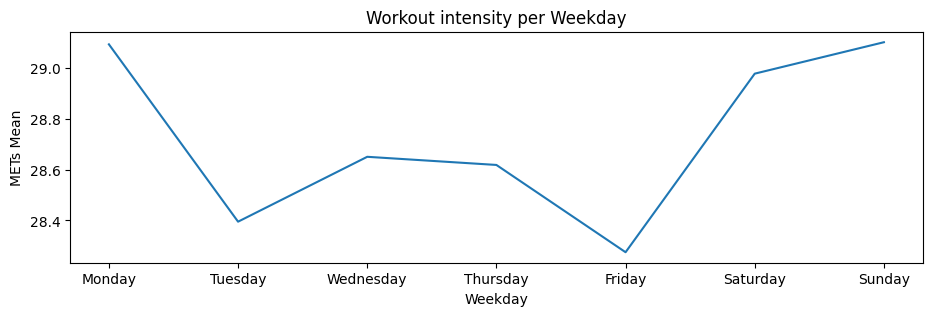

In [22]:
plt.subplots(figsize=(11, 3))
wkdLplot = sns.lineplot(data=grpWdayMets, x="Weekday", y=("METs", "mean"))
wkdLplot.set(xlabel="Weekday",
          ylabel="METs Mean",
          title="Workout intensity per Weekday")

plt.show(wkdLplot)

- As pessoas treinam por maior tempo durante a semana, entretanto, os treinos mais vigorosos ocorrem de Sábado a Segunda-feira

In [23]:
mets["Time"] = mets["ActivityMinute"].apply(lambda x: x.split(sep=" ")[1] + " " + x.split(sep=" ")[2])
mets["Time"] = pd.to_datetime(mets["Time"], format="%I:%M:%S %p")

In [24]:
#mets["ActivityMinute"] = pd.to_datetime(mets["ActivityMinute"], format="%m/%d/%Y %I:%M:%S %p")

In [25]:
grpTime = mets[mets["METs"] >= 11].groupby(pd.Grouper(key='Time', freq='60min'))\
    .agg({
        "METs" : "count"
    }).reset_index()

display(grpTime)

,Time,METs
0,1900-01-01 00:00:00,6103
1,1900-01-01 01:00:00,4327
2,1900-01-01 02:00:00,2827
3,1900-01-01 03:00:00,1795
4,1900-01-01 04:00:00,1938
5,1900-01-01 05:00:00,4154
6,1900-01-01 06:00:00,9247
7,1900-01-01 07:00:00,17284
8,1900-01-01 08:00:00,20367
9,1900-01-01 09:00:00,23022


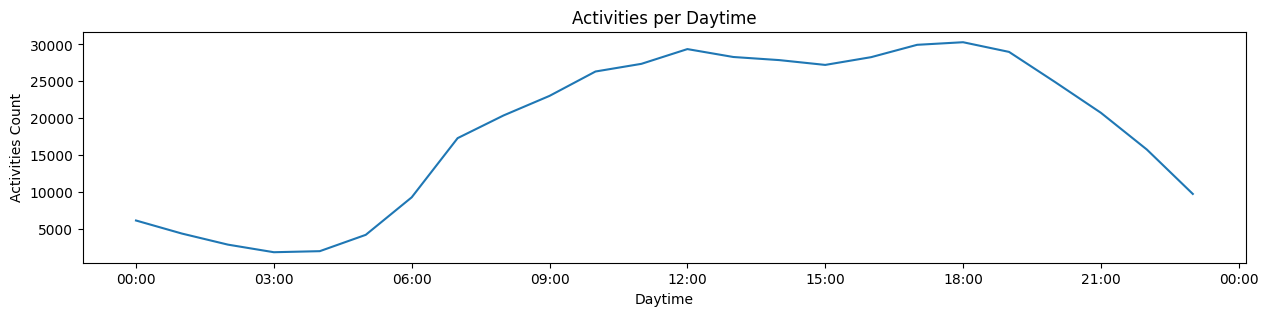

In [26]:
plt.subplots(figsize=(15, 3))
timeLplot = sns.lineplot(data=grpTime, x="Time", y="METs")
timeLplot.xaxis.set_major_locator(mdates.HourLocator(interval=3))
timeLplot.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
timeLplot.set(xlabel="Daytime",
          ylabel="Activities Count",
          title="Activities per Daytime")

plt.show(timeLplot)

In [27]:
grpTimeWkday = mets[mets["METs"] >= 11].groupby(["WeekdayNum", "Weekday", pd.Grouper(key='Time', freq='60min')])\
    .agg({
        "METs" : "count"
    })

display(grpTimeWkday)

METs
WeekdayNum Weekday Time                     
0          Monday  1900-01-01 00:00:00   573
                   1900-01-01 01:00:00   407
                   1900-01-01 02:00:00   182
                   1900-01-01 03:00:00   181
                   1900-01-01 04:00:00   245
...                                      ...
6          Sunday  1900-01-01 19:00:00  3344
                   1900-01-01 20:00:00  2670
                   1900-01-01 21:00:00  2213
                   1900-01-01 22:00:00  1446
                   1900-01-01 23:00:00   835

[168 rows x 1 columns]

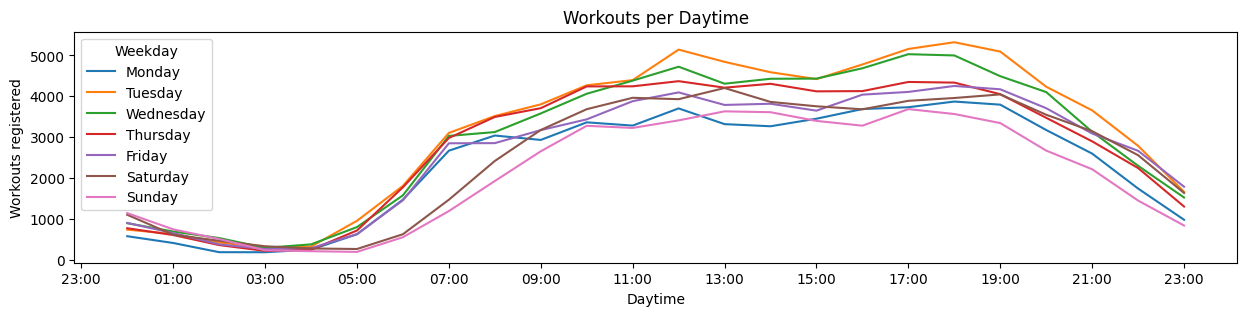

In [28]:
plt.subplots(figsize=(15, 3))
tPolotHue = sns.lineplot(data=grpTimeWkday, x="Time", y="METs",
                         hue="Weekday")
tPolotHue.xaxis.set_major_locator(mdates.HourLocator(interval=2))
tPolotHue.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
tPolotHue.set(xlabel="Daytime",
          ylabel="Workouts registered",
          title="Workouts per Daytime")

plt.show(tPolotHue)

- As pessoas começam a treinar mais tarde aos fins de semana, entretanto, a curva da concentração de treinos por hora é quase homogênea.

In [29]:
grpManReport = weightInfo.groupby("IsManualReport")\
    .agg({
        "Id": "count"
    }).reset_index()

grpManReport["IsManualReport"] = grpManReport["IsManualReport"].replace({
    False: "Automatic",
    True: "Manual"
})

display(grpManReport)

,IsManualReport,Id
0,Automatic,26
1,Manual,41


In [30]:
len(weightInfo["Id"].unique())

8

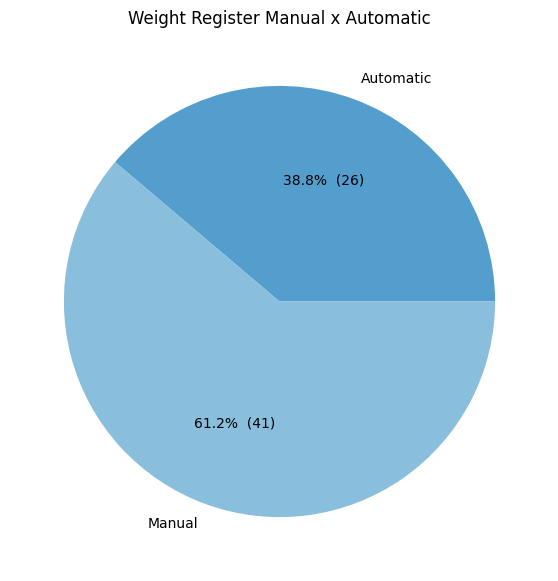

In [31]:
"""def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct"""

cmap = sns.color_palette("Blues_r").as_hex()[2:]

plt.subplots(figsize=(7, 7))
plt.pie(x=grpManReport["Id"], 
        labels = grpManReport["IsManualReport"],
        autopct = make_autopct(grpManReport["Id"]),
        colors = cmap)
plt.title(label="Weight Register Manual x Automatic")
plt.show()

- As pessoas registram mais seu peso manualmente do que automaticamente.

In [32]:
print(dailyActivity["ActivityDate"].min(),
      dailyActivity["ActivityDate"].mean(),
      dailyActivity["ActivityDate"].max() )

2016-04-12 00:00:00 2016-04-26 06:53:37.021276672 2016-05-12 00:00:00


In [33]:
print(len(dailySleep["Id"].unique()),
      len(weightInfo["Id"].unique()))

24 8


- Nem todos os participantes tiveram suas informações sobre o sono registradas (24 registraram).
- Apenas 8 participantes registraram suas atividades de sono.

In [34]:
IdAnalysis = pd.DataFrame()

IdAnalysis["Users"] = dailyActivity["Id"].unique()

IdAnalysis["MonitoredSleep"] = IdAnalysis["Users"].apply(lambda x: True if x in dailySleep["Id"].unique() else False)
IdAnalysis["MonitoredWeight"] = IdAnalysis["Users"].apply(lambda x: True if x in weightInfo["Id"].unique() else False)

display(IdAnalysis.head())

,Users,MonitoredSleep,MonitoredWeight
0,1503960366,True,True
1,1624580081,False,False
2,1644430081,True,False
3,1844505072,True,False
4,1927972279,True,True


In [35]:
monitSleep = {
    "values": [IdAnalysis["MonitoredSleep"].sum(), IdAnalysis.shape[0] - IdAnalysis["MonitoredSleep"].sum()],
    "labels": ["Monitored", "Unmonitored"]
}

monitWeight = {
    "values": [IdAnalysis["MonitoredWeight"].sum(), IdAnalysis.shape[0] - IdAnalysis["MonitoredWeight"].sum()],
    "labels": ["Monitored", "Unmonitored"]
}

In [36]:
print(monitSleep)

{'values': [24, 9], 'labels': ['Monitored', 'Unmonitored']}


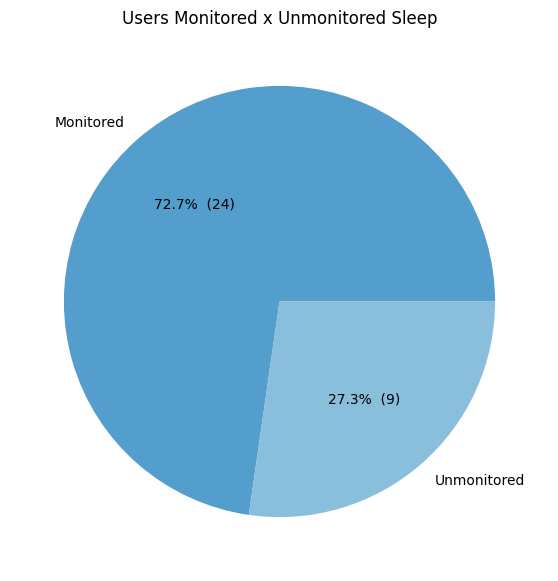

In [37]:
cmap = sns.color_palette("Blues_r").as_hex()[2:]

plt.subplots(figsize=(7, 7))
plt.pie(x=monitSleep["values"], 
        labels = monitSleep["labels"],
        autopct = make_autopct(monitSleep["values"]),
        colors = cmap)
plt.title(label="Users Monitored x Unmonitored Sleep")
plt.show()

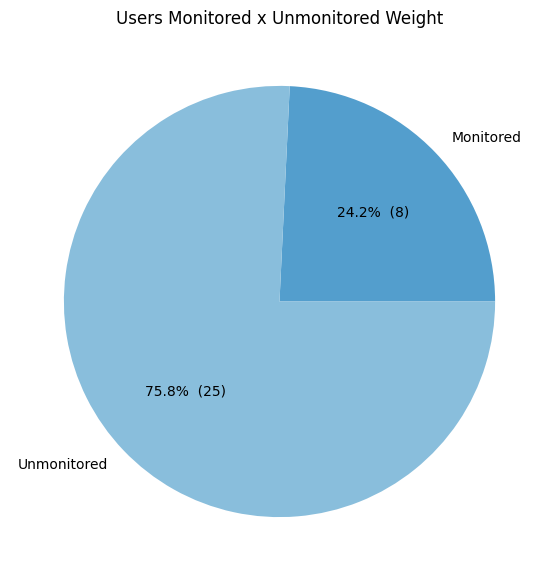

In [38]:
cmap = sns.color_palette("Blues_r").as_hex()[2:]

plt.subplots(figsize=(7, 7))
plt.pie(x=monitWeight["values"], 
        labels = monitWeight["labels"],
        autopct = make_autopct(monitWeight["values"]),
        colors = cmap)
plt.title(label="Users Monitored x Unmonitored Weight")
plt.show()

In [40]:
len(mets["Id"].unique())

33